### Bear Spreads Strategies

In this <a href="https://www.python.org/doc/essays/blurb/">Python</a> notebook, we will dive into options hedging strategies named as Bear Spreads strategies.  

A Bear Spread is an options trading strategy designed for investors expecting a fall in the stock price. The strategy aims to exploit this expected movement while limiting both potential gains and losses.

-  **Bear Call Spread**  
   A bear call spread is composed of:
   $$
   \text{Bear Call Spread} = C(S_t, t; K_2, T) - C(S_t, t; K_1, T)
   $$
   Where:
   - $C(S_t, t; K_1, T)$: Buying a call option at time $t$ with strike price $K_1$ and expiration $T$.
   - $C(S_t, t; K_2, T)$: Selling a call option at time $t$ with strike price $K_2$ ($K_2 > K_1$) and same expiration $T$.

-  **Bear Put Spread**  
   A bear put spread is composed of:
   $$
   \text{Bear Put Spread} = P(S_t, t; K_2, T) - P(S_t, t; K_1, T)
   $$
   Where:
   - $P(S_t, t; K_1, T)$: Buying a put option at time $t$ with strike price $K_1$ and expiration $T$.
   - $P(S_t, t; K_2, T)$: Selling a put option at time $t$ with strike price $K_2$ ($K_2 > K_1$) and same expiration $T$.

To do so, we have to generate multiple scenarios of the underlying asset since its evolution is completely random . To generate such underlying monte_carlo simulations, we will use practical functions of the <a href="https://finance.math.upmc.fr/en/enseignements/1_2_probas_numeriques/">Numerical Probability</a> course from the master's degree <a href="https://finance.math.upmc.fr/en/">M2 Probabilités et Finance</a> taught by both <a href="https://www.lpsm.paris/users/pages/index">Gilles Pagès</a> and <a href="https://perso.lpsm.paris/~vlemaire/site.html">Vincent Lemaire</a> . With their practical hands-on notebooks, we can easily see and plot various scenarios of underlying asset . 

Hence, we then run a notebook called `Monte_Carlo_Simulation.ipynb` where we can find all these functions . We will not provide these functions directly but you can easily implement them to well understand what's going on behind the scenes.

In [1]:
%run Monte_Carlo_Simulation.ipynb  # we run this notebook Monte_Carlo_Simulation

We then provide all the necessary parameters the function `black_scholes_1d` which displays all the underlying asset scenarios. Here is the <a href="https://www.geeksforgeeks.org/python-docstrings/">docstring</a> of the function : 

The Black and Scholes Process is defined by the following <a href="https://ethz.ch/content/dam/ethz/special-interest/mavt/dynamic-systems-n-control/idsc-dam/Lectures/Stochastic-Systems/SDE.pdf">Stochastic Differential Equation</a>

Let $S_t$ be the solution of the SDE on $[0,T]$
$$
    \operatorname{d}\!S_t = r S_t \operatorname{d}\!t + \sigma S_t \operatorname{d}\!B_t, \quad S_0 = x
$$
Then $S_t$ is given by : 
$$
    S_t = x \exp \bigl((r- \sigma^2/2) t + \sigma B_t \bigr)
$$


`black_scholes_1d` : Simulate paths of Black-Scholes process
-    Args:
       - n_times: Number of timesteps
       - n_paths: Number of paths 
       - final_time: Final time of simulation
       - init_value: `S0`
       - r: Interest rate
       - sigma: Volatility
       - random_state: `np.random.Generator` used for simulation
-    Returns:
       - `np.array` of shape `(n_times+1, n_paths)` containing the paths 
       
We then define the function parameters and plot our results to see what happens .

In [2]:
N = 5 
M = 500
S0 = 100
r, sigma = 0.1, 0.2
D = 0 
T = 1 
K_1 = 90
K_2 = 120
St = black_scholes_1d(N, M, init_value=S0, r=r, sigma=sigma) # Paths of BS Process

In [3]:
St[:10] # display the first 10 element of the underlying asset array 

array([[100.        , 100.        , 100.        , ..., 100.        ,
        100.        , 100.        ],
       [106.23115116, 116.03532128, 109.12031585, ..., 108.61527953,
         90.82653708, 104.52884386],
       [128.03801903, 108.06424448,  97.38648565, ..., 105.99416301,
         95.17471519, 102.2592064 ],
       [120.90086531, 105.72700098, 103.26236416, ..., 111.39585872,
        108.6747119 , 101.24418657],
       [132.88417356, 101.3284451 , 101.78754985, ..., 108.21387847,
         82.81367821, 107.42305057],
       [150.37200246, 109.40709028,  90.09633913, ..., 121.65754947,
         77.67491507, 114.26374295]])

In [4]:
import seaborn as sns
sns.set_theme()

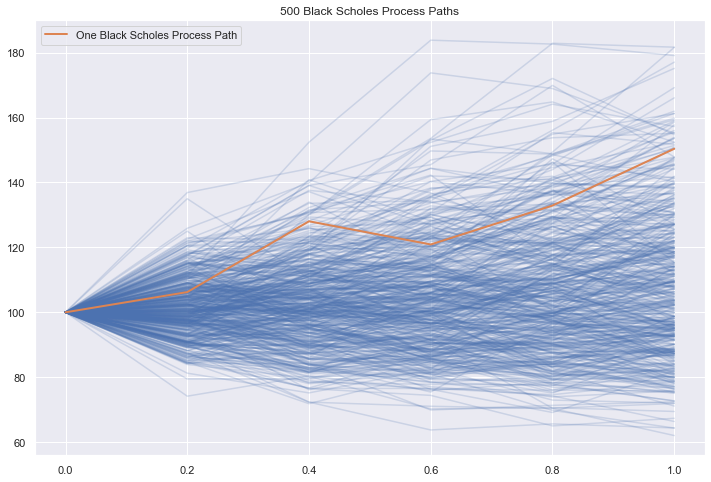

In [5]:
plt.figure(figsize=(12,8))
times = np.arange(N+1)*(T / N)
for S in St.T:
    sns.lineplot(x=times, y=S, color='C0', alpha=0.2)
ax = sns.lineplot(x=times, y=St[:,0], color='C1', lw=2, label='One Black Scholes Process Path')
ax.set(title=f"{M} Black Scholes Process Paths");

We can see in the preceding graph, 500 simulations of Black and Scholes Process. 

The next step is to store the last maturity time values of the BS process that is : Values of $S_t$ for which $t=T$ which is $1$ in our case . Why ? Because, we want to represent the <a href="https://www.math.fsu.edu/~paris/FMexam/DM%20Module%201.pdf">Payoff</a> of covered options strats and because the payoff is generally computed at the maturity for <a href="https://www.schwab.com/options/what-is-trading-options">options</a> .

In [6]:
stock_prices = St.T[:,-1]  # We store the last values at the maturity T of our stock_prices vector

We then <a href="https://www.geeksforgeeks.org/introduction-to-sorting-algorithm/">sort</a> our stock_prices vector in order to well represent the payoff since our simulations are purely random. To sort our vector, we used <a href="https://numpy.org/doc/stable/reference/generated/numpy.sort.html">`np.sort`</a> which has <a href="https://blog.finxter.com/how-to-sort-in-one-line/#:~:text=The%20runtime%20complexity%20of%20the,log(n))%20on%20average.">nlog(n)</a> complexity which the most efficient algorithm to sort tables in modern programming languages .

In [7]:
stock_prices = np.sort(stock_prices) # sort our stock_prices

### Bear Call Spread


A bear call spread is a hedging position designed to buy a call option $C(S_t, t; K_2, T)$ with strike $K_2$ and simultaneously sell a call option $C(S_t, t; K_1, T)$ with strike $K_1$, $K_1 \leq K_2$ on the same underlying asset $S_t$ and having the same expiry time $T$ $(T>t)$.

The value of the strategy at time $t$ is given by :
$$
\Pi_t = - C(S_t, t; K_1, T) + C(S_t, t; K_2, T)
$$


The payoff of this strategy at time $T$ is:
$$
\Psi(S_T) = - C(S_T, T; K_1, T) + C(S_T, T; K_2, T) = - \max(S_T - K_1, 0) + \max(S_T - K_2, 0)= 
\begin{cases} 
0 & \text{if } S_T \leq K_1 \\
K_1 - S_T & \text{if } K_1 < S_T \leq K_2 \\
K_1 - K_2 & \text{if }  S_T > K_2
\end{cases}
$$


The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= - C(S_T, T; K_1, T) + C(S_T, T; K_2, T) + C(S_t, t; K_1, t) - C(S_t, t; K_2, t)= 
\begin{cases} 
C(S_t, t; K_1, T) - C(S_t,t; K_2, T) & \text{if } S_T \leq K_1 \\
K_1 - S_T + C(S_t, t; K_1, T) - C(S_t,t; K_2, T) & \text{if } K_1 < S_T \leq K_2 \\
K_1 - K_2 + C(S_t, t; K_1, T) - C(S_t,t; K_2, T) & \text{if } S_T \geq K_2
\end{cases}
$$


Before plotting the Profit diagram of the bear call spread strategy, we have to compute the option premiums . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premiums of the corresponding options .

In [8]:
premium_1 = EuropeanOptions(S0,K_1,T,sigma,r,D)
premium_1 = premium_1.Call_Black_Scholes()
premium_1

19.988577125395466

In [9]:
premium_2 = EuropeanOptions(S0,K_2,T,sigma,r,D)
premium_2 = premium_2.Call_Black_Scholes()
premium_2

4.708214272370071

After compute the option prices , then here is how we proceed to display the payoff and the profit of the bear call spread strategy : 

- compute `call_k_1_payoff` : maximum(`stock_prices` - `K_1`, 0)

- compute `call_k_2_payoff` : maximum(`stock_prices` - `K_2`, 0)

- compute `call_spread_payoff` : - `call_k_1_payoff` + `call_k_2_payoff`

- Compute `call_k_1_profit` which is in fact the profit the investor can make only the first call option .  
`call_k_1_profit` = - `call_k_1_payoff` + `premium_1` 

- Compute the `call_k_2_profit` which is in fact the profit earn only on the second option . `call_k_2_profit` = `call_k_2_payoff` - `premium_2`

In [10]:
bear_call_spread_payoff = - np.maximum(stock_prices - K_1, 0) + np.maximum(stock_prices - K_2, 0)

In [11]:
bear_call_k_1_profit = - np.maximum(stock_prices - K_1, 0) + premium_1
bear_call_k_2_profit = np.maximum(stock_prices - K_2, 0) - premium_2

In [12]:
bear_call_spread_profit = bear_call_k_1_profit + bear_call_k_2_profit

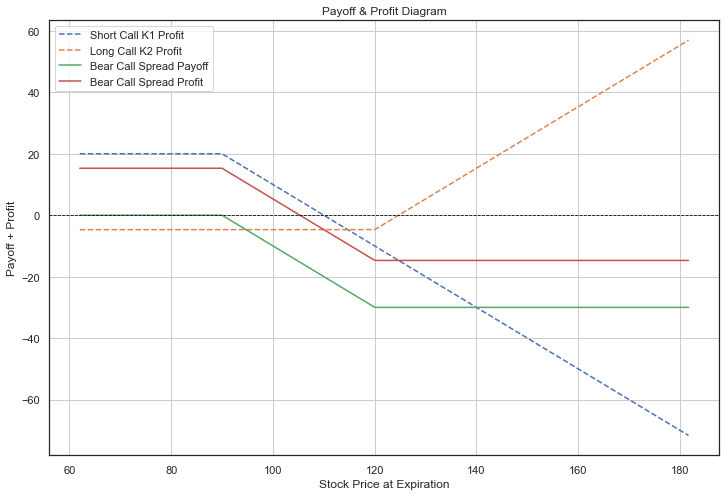

In [13]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, bear_call_k_1_profit, label="Short Call K1 Profit", linestyle='--')
plt.plot(stock_prices, bear_call_k_2_profit, label="Long Call K2 Profit", linestyle='--')
plt.plot(stock_prices, bear_call_spread_payoff, label="Bear Call Spread Payoff")
plt.plot(stock_prices, bear_call_spread_profit, label="Bear Call Spread Profit")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Payoff & Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Payoff + Profit")
plt.legend()
plt.grid()
plt.show()

### Bear Call Spreads Greeks

In [14]:
delta_call_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
delta_call_k_1 = delta_call_k_1.Delta_Call()


delta_call_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
delta_call_k_2 = delta_call_k_2.Delta_Call()


delta_bear_call_spread = - delta_call_k_1 + delta_call_k_2

In [15]:
gamma_call_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
gamma_call_k_1 = gamma_call_k_1.Gamma_Call()


gamma_call_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
gamma_call_k_2 = gamma_call_k_2.Gamma_Call()


gamma_bear_call_spread = - gamma_call_k_1 + gamma_call_k_2

In [16]:
vega_call_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
vega_call_k_1 = vega_call_k_1.Vega_Call()


vega_call_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
vega_call_k_2 = vega_call_k_2.Vega_Call()


vega_bear_call_spread = - vega_call_k_1 + vega_call_k_2

In [17]:
theta_call_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
theta_call_k_1 = theta_call_k_1.Theta_Call()


theta_call_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
theta_call_k_2 = theta_call_k_2.Theta_Call()


theta_bear_call_spread = - theta_call_k_1 + theta_call_k_2

We then plot the greeks of the Bear Call Spread

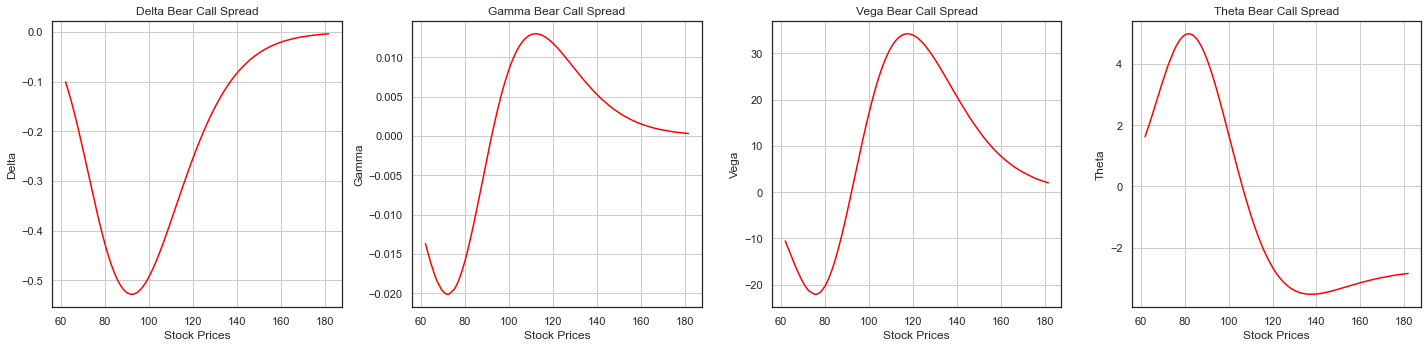

In [18]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

# Delta Bear Call Spread
axes[0].plot(stock_prices, delta_bear_call_spread, c='red')
axes[0].set_title('Delta Bear Call Spread')
axes[0].set_xlabel('Stock Prices')
axes[0].set_ylabel('Delta')
axes[0].grid()

# Gamma Bear Call Spread
axes[1].plot(stock_prices, gamma_bear_call_spread, c='red')
axes[1].set_title('Gamma Bear Call Spread')
axes[1].set_xlabel('Stock Prices')
axes[1].set_ylabel('Gamma')
axes[1].grid()

# Vega Bear Call Spread
axes[2].plot(stock_prices, vega_bear_call_spread, c='red')
axes[2].set_title('Vega Bear Call Spread')
axes[2].set_xlabel('Stock Prices')
axes[2].set_ylabel('Vega')
axes[2].grid()

# Theta Bear Call Spread
axes[3].plot(stock_prices, theta_bear_call_spread, c='red')
axes[3].set_title('Theta Bear Call Spread')
axes[3].set_xlabel('Stock Prices')
axes[3].set_ylabel('Theta')
axes[3].grid()

# Adjust layout
plt.tight_layout()
plt.show()

As we expected, the bear call spread greeks are just the opposite of the bull call spread greeks . In fact, this strategy is just the opposite of the bull call strategy .

### Bear Put Spread

A bear put spread is a hedging position designed to buy a put option $P(S_t, t; K_2, T)$ with strike $K_2$ and simultaneously sell a put option $P(S_t, t; K_1, T)$ with strike $K_1$, $K_1 \leq K_2$ on the same underlying asset $S_t$ and having the same expiry time $T$ $(T>t)$.

The value of the strategy at time $t$ is given by :
$$
\Pi_t = - P(S_t, t; K_1, T) + P(S_t, t; K_2, T)
$$


The payoff of this strategy at time $T$ is:
$$
\Psi(S_T) = - P(S_T, T; K_1, T) + P(S_T, T; K_2, T) = - \max(K_1 - S_T, 0) + \max(K_2 - S_T, 0)= 
\begin{cases} 
K_2 - K_1 & \text{if } S_T \leq K_1 \\
K_2 - S_T & \text{if } K_1 < S_T \leq K_2 \\
0 & \text{if }  S_T > K_2
\end{cases}
$$


The profit of this strategy is given by :

$$
\Gamma(S_T) = \Psi(S_T) - \Pi_t= - P(S_T, T; K_1, T) + P(S_T, T; K_2, T) + P(S_t, t; K_1, t) - P(S_t, t; K_2, t)= 
\begin{cases} 
K_2 - K_1 + P(S_t, t; K_1, T) - P(S_t, t; K_2, T) & \text{if } S_T \leq K_1 \\
K_2 - S_T + P(S_t, t; K_1, T) - P(S_t, t; K_2, T) & \text{if } K_1 < S_T \leq K_2 \\
P(S_t, t; K_1, T) - P(S_t, t; K_2, T) & \text{if } S_T \geq K_2
\end{cases}
$$


Before plotting the Profit diagram of the bear put spread strategy, we have to compute the option premiums . Thanks to our `EuropeanOptions` class we implemented in previous notebook you can find on my github <a href="https://github.com/Ncxs99/Financial-Mathematics/blob/master/Equity%20Derivatives%20Pricing/European%20Options/Europea_Options.ipynb">Ncxs99</a> . We then use our class to directly find the premiums of the corresponding options .

In [19]:
premium_1 = EuropeanOptions(S0,K_1,T,sigma,r,D)
premium_1 = premium_1.Put_Black_Scholes()
premium_1

1.423944748631829

In [20]:
premium_2 = EuropeanOptions(S0,K_2,T,sigma,r,D)
premium_2 = premium_2.Call_Black_Scholes()
premium_2

4.708214272370071

After compute the option prices , then here is how we proceed to display the payoff and the profit of the put spread strategy : 

- compute `bear_put_k_1_payoff` : maximum(`K_1` - `stock_prices`, 0)

- compute `bear_put_k_2_payoff` : maximum(`K_2` - `stock_prices`, 0)

- compute `bear_put_spread_payoff` : -`bear_put_k_1_payoff` + `bear_put_k_2_payoff`

- Compute `bear_put_k_1_profit` which is in fact the profit the investor can make only the first call option .  
`bear_put_k_1_profit` = -`bear_put_k_1_payoff` + `premium_1` 

- Compute the `bull_put_k_2_profit` which is in fact the profit earn only on the second option . `bear_put_k_2_profit` = `bear_put_k_2_payoff` - `premium_2`

In [21]:
bear_put_spread_payoff = - np.maximum(K_1 - stock_prices, 0) + np.maximum(K_2 - stock_prices, 0)

In [22]:
bear_put_k_1_profit = - np.maximum(K_1 - stock_prices, 0) + premium_1
bear_put_k_2_profit = np.maximum(K_2 - stock_prices, 0) - premium_2

In [23]:
bear_put_spread_profit = bear_put_k_1_profit + bear_put_k_2_profit

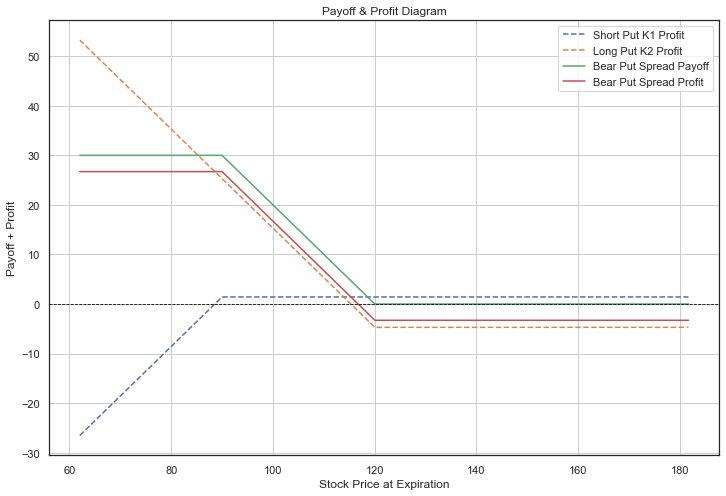

In [24]:
sns.set_theme(style='white')
plt.figure(figsize=(12, 8))
plt.plot(stock_prices, bear_put_k_1_profit, label="Short Put K1 Profit", linestyle='--')
plt.plot(stock_prices, bear_put_k_2_profit, label="Long Put K2 Profit", linestyle='--')
plt.plot(stock_prices, bear_put_spread_payoff, label="Bear Put Spread Payoff")
plt.plot(stock_prices, bear_put_spread_profit, label="Bear Put Spread Profit")
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.title("Payoff & Profit Diagram")
plt.xlabel("Stock Price at Expiration")
plt.ylabel("Payoff + Profit")
plt.legend()
plt.grid()
plt.show()

### Bear Put Spread Greeks

In [25]:
delta_put_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
delta_put_k_1 = delta_put_k_1.Delta_Put()


delta_put_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
delta_put_k_2 = delta_put_k_2.Delta_Put()


delta_bear_put_spread = - delta_put_k_1 + delta_put_k_2

In [26]:
gamma_put_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
gamma_put_k_1 = gamma_put_k_1.Gamma_Put()


gamma_put_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
gamma_put_k_2 = gamma_put_k_2.Gamma_Put()


gamma_bear_put_spread = - gamma_put_k_1 + gamma_put_k_2

In [27]:
vega_put_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
vega_put_k_1 = vega_put_k_1.Vega_Put()


vega_put_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
vega_put_k_2 = vega_put_k_2.Vega_Put()


vega_bear_put_spread = - vega_put_k_1 + vega_put_k_2

In [28]:
theta_put_k_1 = EuropeanOptions(stock_prices, K_1, T, sigma, r, D)
theta_put_k_1 = theta_put_k_1.Theta_Put()


theta_put_k_2 = EuropeanOptions(stock_prices, K_2, T, sigma, r, D)
theta_put_k_2 = theta_put_k_2.Theta_Put()


theta_bear_put_spread = - theta_put_k_1 + theta_put_k_2

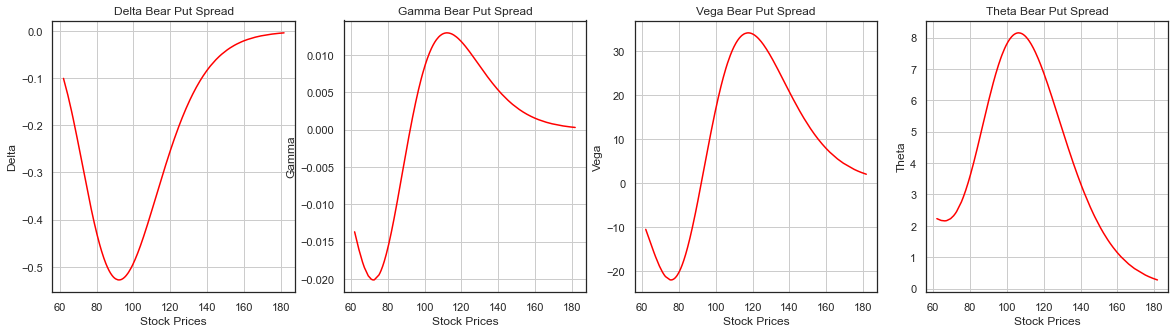

In [29]:
# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True)

# Delta Bear Put Spread
axes[0].plot(stock_prices, delta_bear_put_spread, c='red')
axes[0].set_title('Delta Bear Put Spread')
axes[0].set_xlabel('Stock Prices')
axes[0].set_ylabel('Delta')
axes[0].grid()

# Gamma Bear Put Spread
axes[1].plot(stock_prices, gamma_bear_put_spread, c='red')
axes[1].set_title('Gamma Bear Put Spread')
axes[1].set_xlabel('Stock Prices')
axes[1].set_ylabel('Gamma')
axes[1].grid()

# Vega Bear Put Spread
axes[2].plot(stock_prices, vega_bear_put_spread, c='red')
axes[2].set_title('Vega Bear Put Spread')
axes[2].set_xlabel('Stock Prices')
axes[2].set_ylabel('Vega')
axes[2].grid()

# Theta Bear Put Spread
axes[3].plot(stock_prices, theta_bear_put_spread, c='red')
axes[3].set_title('Theta Bear Put Spread')
axes[3].set_xlabel('Stock Prices')
axes[3].set_ylabel('Theta')
axes[3].grid()


As we expected, the bear put spread greeks are just the opposite of the bull put spread greeks . In fact, this strategy is just the opposite of the bull put strategy .